# Exercise 10.1 

# tomato-or-apple with custom loss function

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip \*.zip

In [ ]:
directory = "/content/gdrive/My Drive/Datasets/apple-or-tomato/"

In [ ]:
import pathlib

In [ ]:
path = pathlib.Path(directory)

In [ ]:
train_dir = path / 'training_set'
validation_dir = path / 'test_set'

In [ ]:
train_apple_dir = train_dir / 'apple'
train_tomato_dir = train_dir /'tomato'
validation_apple_dir = validation_dir / 'apple'
validation_tomato_dir = validation_dir / 'tomato'

In [ ]:
import os

In [ ]:
total_train = len(os.listdir(train_apple_dir)) + len(os.listdir(train_tomato_dir))
total_val = len(os.listdir(validation_apple_dir)) + len(os.listdir(validation_tomato_dir))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(img_height, img_width),
                                                           class_mode='binary')

Found 1300 images belonging to 2 classes.


In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(img_height, img_width),
                                                              class_mode='binary')

Found 648 images belonging to 2 classes.


In [ ]:
import matplotlib.pyplot as plt

0.0


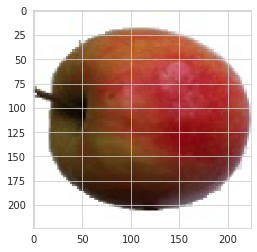

1.0


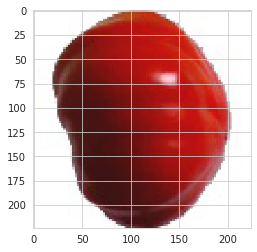

1.0


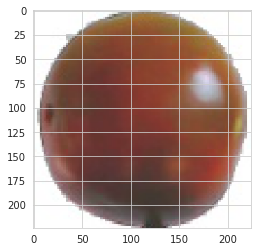

0.0


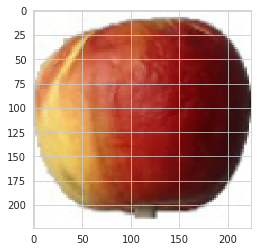

1.0


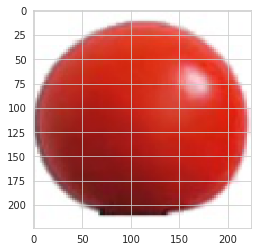

In [ ]:
for _ in range(5):
    img, label = train_data_gen.next()
    plt.imshow(img[0])
    plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
# custom loss here
# https://neptune.ai/blog/keras-loss-functions


def custom_loss_function(y_true, y_pred):
   print("y_pred ",y_pred)
   print("y_true ", y_true)
   squared_difference = tf.square(float(y_true)-float(y_pred))
   return tf.reduce_mean(squared_difference, axis=-1)
 #  model.compile(optimizer='adam', loss=custom_loss_function)

In [ ]:
from tensorflow.keras.applications import NASNetMobile

In [ ]:
base_model = NASNetMobile(include_top=False, input_shape=(img_height, img_width , 3), weights='imagenet')

20004864/19993432 [==============================] - 0s 0us/step


In [ ]:
base_model.trainable = False

In [ ]:
from tensorflow.keras.layers import Flatten, Dense

In [ ]:
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(500, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Functional)          (None, 7, 7, 1056)        4269716   
_________________________________________________________________
flatten (Flatten)            (None, 51744)             0         
_________________________________________________________________
dense (Dense)                (None, 500)               25872500  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 501       
Total params: 30,142,717
Trainable params: 25,873,001
Non-trainable params: 4,269,716
_________________________________________________________________


In [ ]:
model.compile(
        optimizer='adam',
        loss=custom_loss_function,
        metrics=['accuracy']
    )

In [ ]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=5,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/5
y_pred  Tensor("sequential/dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=float32)
y_pred  Tensor("sequential/dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=float32)
40/40 [==============================] - ETA: 0s - loss: 0.2397 - accuracy: 0.7595y_pred  Tensor("sequential/dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)
y_true  Tensor("ExpandDims:0", shape=(None, 1), dtype=float32)
40/40 [==============================] - 29s 367ms/step - loss: 0.2397 - accuracy: 0.7595 - val_loss: 0.1560 - val_accuracy: 0.8438
Epoch 2/5
40/40 [==============================] - 10s 240ms/step - loss: 0.0451 - accuracy: 0.9543 - val_loss: 0.0391 - val_accuracy: 0.9609
Epoch 3/5
40/40 [==============================] - 9s 236ms/step - loss: 0.0315 - accuracy: 0.9685 - val_loss: 0.0389 - val_accuracy: 0.9609
Epoch 4/5
40/40 [==============================] - 9s 237ms/step - 